# Data management


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from models.candlestick import Candlestick

candlestick = Candlestick()

bitcoin_prices = candlestick.to_df()

type(bitcoin_prices)


def logDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    return x_diff

def changeDiff(x):
    x_diff = np.diff(x) / x[:-1] * 100
    return x_diff

## Data description and calculation

### Describe data


In [ ]:
bitcoin_prices.head(10)

bitcoin_prices['open'].mean()

bitcoin_prices.describe()

In [ ]:
bitcoin_prices.corr()

In [ ]:
df = pd.DataFrame([(.2,.3), (.0,.6), (.6, .0), (.2, .1)], columns=['dogs', 'cats'])

print(df)

print(df.describe())

df.corr()

### Internal rate of return



In [ ]:
cashflow = pd.Series(index=[0, 1, 2, 3, 4,5], name='Cashflow', data=[-107,5,5,5,5,105])

print(cashflow)

#irr lai suat hoan von noi bo (research)
np.irr(cashflow)

In [ ]:
data = pd.read_excel("data/UKHP.xls", index_col=0)
data.describe()
print(data)

In [ ]:
data['dhp'] = logDiff(data['Average House Price'])
data['chp'] = changeDiff(data['Average House Price'])
print(data['Average House Price'])
print('____________________')
print(data['dhp'])
print('____________________')
print(data['chp'])

In [ ]:
data['dhp'] = logDiff(data['Average House Price'])
print(data['Average House Price'])
print('__________')
print(data['Average House Price'].shift(1))
print('__________')
print(data['dhp'])

### Plots


In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))

plt.plot(data['Average House Price'], label='hp')

plt.xlabel('Date')
plt.ylabel('Average House Price')
plt.title('Graph')
plt.grid(True)

plt.legend()
plt.show()

### Simple linear regression


In [ ]:
import statsmodels.formula.api as smf

data = pd.read_excel("data/SandPhedge.xls", index_col=0)

formula = 'Spot ~ Futures'

results = smf.ols(formula, data).fit()

print(results.summary())

data.plot.scatter(x='Spot', y='Futures', c='DarkBlue')

# plt.figure(figsize=(20,10))
# plt.scatter(pd['Spot'],pd['Futures'], label='skitscat', color='k', s=25, marker="o")

# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Interesting Graph\nCheck it out')
# plt.legend()
# plt.show()

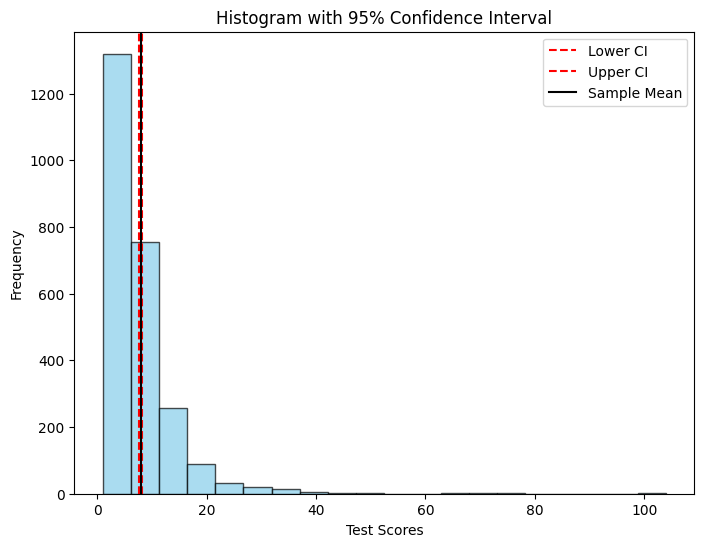

Confidence Interval (95%): (7.679438034580011, 8.189571550084526)


In [1]:
from matplotlib import pyplot as plt
import collections
import numpy as np


arr = [3.1,4.33,4.15,5.91,5.41,10.31,5.07,2.9,2.43,2.52,2.96,2.9,2.54,5.43,2.33,2.61,3.02,3.31,4.08,10.63,4.68,2.67,3.64,4.28,4.49,2.94,2.3,4.08,3.55,3.59,3.3,2.12,3.96,3.39,2.66,5.44,2.91,4.18,2.6,3.81,2.35,3.64,4.06,4.09,9.2,6.39,6.77,3.23,5.02,3.64,2.45,6.29,4.7,5.02,8.42,3.38,3.8,3.91,5.37,3.02,4.37,6.57,2.79,3.13,3.02,3.9,5.19,3.39,3.93,4.88,6.14,2.34,3.22,12.4,7.5,5.97,25.66,8.19,6.09,9.38,8.36,4.39,4.9,8.08,2.03,2.99,4.28,6.49,4.14,3.81,5.53,4.1,2.23,6.4,3.48,4.4,5.33,4.11,1.85,2.24,3.95,4.1,4.34,3.17,13.13,6.39,6.95,15.34,11.42,6.17,2.6,2.41,2.52,5.53,3.06,3.97,2.26,3.79,8.81,2.5,1.79,3.55,2.88,3.41,8.66,5.51,1.93,2.61,5.76,3.26,3.86,5.69,1.83,1.53,2.05,13.11,2,2.37,3.19,1.98,1.62,0.99,3.27,4.44,1.91,4.24,3.11,2.06,1.84,2.94,9.21,4.24,3.02,8.16,3.19,1.65,2.82,2.3,5.93,4,4.64,1.66,2.7,4.94,3.05,3.79,3.6,5.24,1.75,1.95,4.15,3.33,8.43,9.55,4.78,2.23,6.4,6.62,3.96,6.53,2.87,3.03,3.58,7.11,8.49,4.95,5.99,6.81,9.55,9.28,22.94,24.69,5.37,5.13,7.29,6.57,5.87,5.45,5.53,8.39,13.84,17.07,16.01,5.38,8.1,19.07,3.49,7.26,10.89,3.98,6.51,5.61,7,4.13,10.81,13.82,9.04,7.55,10.33,14.47,9.7,5.23,13.62,27.01,6.41,4.84,6.8,7.93,9.58,27.58,5.94,13.38,11.9,7.82,15.01,10.92,6.19,5.63,1.23,2.99,2.4,2.72,3.52,6.04,1.87,2.19,3.97,3.47,2.83,3.44,7.43,4.47,3.54,1.96,2.68,3.36,1.59,1.85,2.52,3.67,1.91,1.65,3.7,5.94,2.34,2.92,1.78,3,3.62,2.48,2.3,8.29,9.06,2.55,3.28,6.87,6.24,2.41,3.14,4.11,4.13,3.69,9.64,7.31,9.54,5.7,12.08,4.24,4.52,5.25,4.05,27.55,4.72,3.77,3.96,2.25,7,4.2,7.26,4.8,3.15,4.21,4.79,4.94,3.15,3.62,2.83,5.22,3.91,2.97,3.46,3.93,7.7,3.79,9.99,3.5,5.31,7.58,3.75,3.84,4.75,4.42,2.03,2.19,4.38,1.5,1.89,3.63,3.81,4.3,2.87,3.37,3.48,4.84,10.37,3.5,3.17,4.19,5.38,6.55,5.39,6.56,7.87,6.48,7.21,6.81,12.35,2.57,4.94,5.88,3.46,3.09,3.08,5,5.94,4.33,3.21,3.45,2.26,4.93,6.8,4.03,8.68,7.77,5.07,3.22,4.39,3.72,4.68,3.19,7.73,1.3,0.94,1.79,2.02,4.37,2,6.26,1.55,2.03,2.5,2.45,3.98,2.56,5.08,4.59,1.93,2.45,3.8,4,3.27,4,2.92,1.38,3.11,3.32,7.32,4.3,7.95,4.25,4.1,5.95,2.41,5.4,4.91,6.9,5.06,1.25,4.44,3.22,4.16,1.93,3.19,2.11,2.86,3.91,8.28,3.8,9.43,2.8,1.73,1.06,3.1,3.13,4.37,8.64,4.62,2.99,2.36,4.65,35.43,9.43,6.82,2,3.46,0.88,1.26,2.09,1.78,4.55,5.23,2.22,2.54,3.94,9.79,10.48,6.83,4.38,5.9,4.47,1.62,2.6,3.02,1.85,7.06,2.29,5.77,3.39,3.97,3.11,4.01,4.97,3.83,2.19,12.69,9.2,3.96,2.97,6.76,4.24,2.01,4.67,11.36,8.14,5.88,8.95,8.48,9.86,32.89,3.43,8.28,2.92,5.38,4.46,8.63,9.53,5.77,9.25,6.96,2.34,2.95,2.83,3.76,4.25,10.45,4.63,3.78,3.72,21.45,3.83,2.68,4.55,6.81,13.19,2.88,3.62,3.37,7.64,5.97,3.08,2.29,4.78,2.19,2.5,5.15,8.96,3.02,3.32,2.58,2.85,3.38,5.68,6.04,5.13,7.74,5.62,1.64,5.72,4.59,6.38,3.61,13.36,2.12,10.92,4.1,2.01,5.22,3.7,4.38,4.18,2.7,3.08,3.87,11.58,5.26,3.69,3.54,2.83,7.95,6.11,17.16,5.98,3.06,7.44,2.76,5.99,3.14,4.17,4.13,5.15,2.13,2.47,2.75,3.15,4.32,2.78,7.14,4.67,5.57,3.49,7.71,4.58,4.71,7.35,4.72,4.78,7.76,10.47,11.78,8.83,8.47,5.21,7.38,9.48,5.68,13.92,11.46,12.42,13.4,13.58,13.06,13.28,6.65,5.89,4.9,2.92,3.95,11.98,4.73,5.14,3.23,3.99,2.99,3.51,5.87,3.18,4.36,5.9,4.59,4.94,3.04,3.57,7.34,8.67,6.24,7.76,4.06,2.38,3.49,10.82,5.73,5.93,3.32,4.25,3.19,3.36,4.51,9.39,5.44,8.79,9.06,3.45,3.99,3.62,7.48,6.34,6.5,4.62,5.17,10.14,3.55,7.66,5.76,6.26,4.07,6.18,5.26,8.27,6.41,4.31,7.07,5.19,1.86,5.74,3.73,4.94,3.94,11.37,3.83,5.18,4.06,2.64,5.77,4.97,4.74,6.77,1.52,2.79,3.83,3.45,5.18,6.52,4.65,8.3,13.17,5.26,6.62,7.95,4.38,2.81,2.41,3.97,5.7,6.49,5.28,10.65,2.27,3.57,3.65,5.76,7.24,6.24,6.82,6.97,7.8,9.26,5.87,20.18,16.78,7.86,7.44,5.35,3.93,11.1,6.12,5.42,11.4,7.33,6.21,10.1,23.72,25.61,27.46,10.8,5.26,7.17,14.29,7.72,15.06,2.62,4.48,5.08,5.44,3.85,4.02,3.52,8.65,4.01,4.3,2.16,4.58,3.05,2.48,2.86,2.17,3.08,2.81,3.28,8.65,2.67,2.67,3.73,2.47,2.23,3.02,3.21,3.75,3.43,5.51,3.46,2.65,4.24,3.68,5.55,7.45,3.59,4.19,5.23,7.67,6.85,10.53,5.88,7.46,10.78,4.71,4.32,8.96,5.25,15.69,5.24,5.12,6.85,7.35,4.53,10.27,16.19,4.02,4.06,4.54,10.64,8.7,4.24,8.57,7.96,6.73,3.58,11.96,3.06,3.83,7.18,9.93,4.09,5.66,13.01,4.05,8.5,2.97,9.52,5.56,4.84,3.99,3.25,8.59,8.01,5.41,3.58,3.44,4.97,5.56,6.05,5.69,4.29,5.72,6.94,8.07,10.81,11.43,4.21,9.52,6.14,5.03,6.63,6.35,9.45,6.81,7.84,4.95,8.79,4.29,7.9,7.15,4.42,8.27,8.73,6.76,6.38,5.77,4.58,9.45,5.49,6.33,3.78,12.47,7.68,6.02,8.43,6.93,6.89,9.47,5.4,9.38,6.23,7.42,6.74,25.7,16.74,9.05,16.36,22.37,15.38,17.8,11.21,12.02,8.63,5.41,5.56,8.99,6.04,3.57,5.06,5.7,4.35,14.42,4.65,10.44,4.21,4.4,5.25,14.07,5.6,5.67,8.35,4.61,4.12,10.19,12.54,13.24,10.13,10.32,8.95,9.5,15.82,28.49,28.97,15.96,26.2,4.7,5.18,5.92,12.76,8.18,4.11,3.66,5.93,8.66,6.2,6.12,4.4,9.45,6.71,2.32,2.68,3.82,8.63,3.16,3.25,5.99,6.38,4.36,5.51,6.14,6.64,4.03,8.74,4.09,2.73,5.2,4.45,10.59,3.92,6.35,4.77,3.89,6.13,9.74,6.6,3.94,4.66,5.36,3.04,4.77,6.42,5.06,7.01,3.27,6.47,5.3,4.92,2.95,6.25,6.05,5.56,6.34,3.35,7.43,7.64,8.86,4.91,8,5.37,6.04,13.84,4.73,5.13,6.03,12.55,9,7.88,9.06,23.33,6.29,7.68,12.25,6.83,3.72,8.33,12.37,5.1,7.02,4.61,4.37,5.63,8.01,7.31,6.82,9.59,11.92,6.22,4.21,11.78,5.41,8.11,8.04,6.71,4.86,4.56,4.56,7,11.38,4.57,15.18,6.82,21.5,19.4,10.95,7.36,10.68,6.8,4.05,4.65,8.03,5.79,8.79,6.21,8.95,3.84,8.01,8.42,4.31,15.56,4.48,3.56,3.79,3.35,6.26,5.12,4.93,7.96,4.47,3.8,4.01,4.18,7.97,4.77,4.9,8.4,9.15,5.25,6.44,5.52,9.39,6.3,12.05,6.33,9.47,8.34,10.59,9.31,4.8,16.42,11.49,46.4,16.06,5.1,6.19,11.4,7.49,9.84,5.46,18.37,9.07,5.73,6.68,8.04,5.1,7.25,10.93,16.55,8.18,18.34,8.69,12.6,7.75,16,9.46,17.53,21.24,13.71,2.64,5.29,3.36,5.71,6.03,5.02,7.14,4.55,5.73,5.64,9.52,19.81,4.78,4.11,7.94,4.93,7.24,9.99,12.82,4.64,5.1,6.63,4.11,9.41,5.54,7.22,7.76,7.79,5.75,4.87,5.16,7.84,11.72,5.28,5.95,5.61,5.11,11.25,7.37,7.66,6.43,6.98,8.1,4.77,17.66,5.03,11.36,12.16,14.81,5.33,4.44,7.32,7.66,6.96,7.33,40.6,6.34,7.38,9.78,6.86,11.64,36.89,8.15,10.48,8.06,21.08,4.74,8.49,5.92,6.01,5.49,3.39,6.88,9.27,5.88,9.52,4.54,6.29,4.51,5.74,8.09,7.13,9.74,7.19,6.49,6.01,12.54,11.8,7.21,5.98,17.66,7.23,6.34,6.47,6.66,6.61,5.63,5.17,8.5,3.36,7.38,4.72,7.26,6.17,10.74,3.63,3.58,6.63,5.53,13.51,10.84,7.99,6.73,4.45,6.22,9.19,7.14,4.07,6.02,3.33,4.99,7.82,7.8,4.43,5.26,8.36,8.2,5.05,6.41,7.7,8.04,8.7,7.44,6.43,9.08,11.37,11.03,15.81,26.79,25.49,8.65,5.63,10.73,6.5,7.96,5.26,8.21,9.7,6.59,8.24,7.7,13.78,13.52,13.71,4.62,10.86,14.71,8.7,7.33,9.86,15.29,16.76,19.69,20.17,15.86,13.77,16.43,32.84,49.33,14.13,39.96,35.18,104.29,14.25,13.42,15.84,12.1,10.03,14.34,31.02,10.06,23.92,16.64,6.79,12.35,14.76,19.79,21.36,11.65,4.82,4.77,8.3,5.94,7.82,8.01,12.19,11.9,9.56,24.29,21.18,10.47,16.43,13.66,31.9,13.12,19.43,9.36,10.98,11.94,8.3,7.7,17.27,4.7,5.22,15.29,14.85,13.83,6.61,11.87,6.47,5.67,6.41,5.12,8.3,4.05,4.71,7.22,6.65,14.63,4.59,7.91,5.21,3.66,4.69,4.58,6.6,7.52,12.66,6.68,8.24,13.01,6.55,8.63,8.51,8.74,5.48,5.72,8.94,9.94,11.14,8.57,8.06,13.44,7.99,12.36,17.26,12.05,32.75,26.33,6.23,15.43,9.93,8.23,16.91,11.18,18.71,10.89,19.65,13.06,10.17,15.1,12.34,14.63,8.3,9.64,9.4,12.52,10.41,10.58,8.48,7.47,6.41,10.7,12.51,14.25,9.32,8.23,6.67,6.27,15.61,19.59,12.83,10.55,11.95,7.91,9.56,19.8,9.29,17.92,14.73,51.5,14.81,9.49,21.28,12.43,9.53,11.11,24.66,21.73,15.31,9.02,6.86,8.55,9.08,8.74,14.43,8.2,18.9,13.97,23.16,16.55,18.28,12.25,17.98,13.74,22,19.32,5.65,4.89,11.73,7.79,7.47,7.1,8.33,12.49,6.29,6.08,7.21,15.48,7.07,9.71,16.91,15.44,13.37,9.83,12.56,29.23,16.28,11.13,12.54,13.74,10.49,7.05,16.69,13.81,7.9,20.2,5.48,7.61,10.84,5.59,4.72,4.49,7.83,6,13.63,8.65,9.36,7.08,6.34,7.23,3.92,5.41,6.86,6,10.67,4.61,7.95,6.14,8.77,7.51,6.31,17.4,4.53,3.5,2.57,2.94,9.3,2.95,3.59,3.91,4.59,5.36,5.65,3.46,4.51,4.31,6,3.4,3.95,2.8,8.75,7.14,2.77,2,5.22,4.62,3.19,5.94,6.41,6.84,4.77,14.55,5.11,2.27,3.44,4.26,3.92,4.72,5.39,8,6.06,4.69,3.52,4.92,7.33,8.76,6.42,13.51,13.28,29.32,12.2,7.74,5.27,10.57,2.2,5.33,9.89,3.65,10.05,5.07,6.24,4.81,8.73,4.39,14.34,7.89,12.29,11.76,7.83,3.64,10.49,6.79,13.94,5.36,4.77,3.7,12.05,5.18,5.36,5.97,7.75,25.84,8.13,6.24,8.72,4.25,12.14,19.17,6.95,12.47,2.34,2.49,4.44,5.35,3.43,2.53,2.8,1.85,6.46,2.92,2.87,7.75,3.66,2.1,2.76,5.28,5.85,3.32,6.77,3.56,2.85,1.98,4.02,2.56,3.29,4.19,3.88,10.25,5.39,3.17,6.15,1.37,4.03,2.22,3.89,2.72,3.15,4.74,2.05,5.6,3.63,2.15,5.96,11.81,3.37,3.38,1.83,4.26,2.54,3.36,4.23,4.97,13.55,7.61,6.15,8.83,2.54,4.01,4.33,3.14,3.84,5.97,2.45,5.5,7.11,6.88,3.93,6.76,3.23,3.27,5.55,5.14,4.29,3.93,8.97,19.39,5.03,4.51,8.68,6.73,4.48,6.85,7.32,6.14,4.25,11.43,9.36,6.24,4.8,3.75,3.97,5.04,7.25,5.09,3.32,9.33,6.64,5.84,3.36,15.48,6.83,3.41,6.25,4.18,4.18,13.53,4.86,6.62,9.17,11.94,2.86,3.26,4.09,10.05,6.35,2.58,7.01,5.79,7.7,9.22,5.42,7.74,7.17,15.68,13.99,10.02,28.31,20,7.9,10.58,24.31,13.78,11.39,66.33,70.19,11.59,5.18,12.24,19.96,6.73,4.35,4.91,5.23,5.05,8.86,7.24,6.59,12.08,13.91,25.67,9.4,11.23,7.15,6.18,9.76,9.58,18.58,12.99,10.2,19.04,11.27,6.59,9.29,8.33,6.55,7.3,4.57,8.96,3.61,5.88,8.65,5.82,6.65,8.63,7.96,7.24,20.57,5.32,7.56,6.77,7.35,4.84,9.42,11.41,3.76,3.9,4.39,13.03,7.94,11.53,7.34,9.14,22.63,5.5,6.09,8.75,13.75,4.31,10.32,5.73,6.77,4.72,2.71,9.34,6.56,2.24,5,5.64,3.84,6.97,4.61,5.43,2.79,3.65,6.12,6.41,2.06,2.96,5.22,16.57,11.16,11.64,2.66,3.43,2.58,2.96,2.75,2.45,4.16,3.1,3.47,3.29,3.46,7.53,4.43,6.4,6.48,4.79,5.56,4.33,9.39,5.2,12.8,11.02,5.2,18.29,13.98,2.84,3.75,9.81,4.21,3.22,8.1,4.89,2.95,4.18,6.38,8.87,3.66,6.04,6.74,2.83,5.35,7.83,2.75,2.53,3.74,4.47,7.33,5.38,8.83,13.06,17.05,19.77,4.18,13.46,4,3.86,5.48,3.08,5.4,7.08,8.61,7.47,2.07,4,1.97,5.58,4.09,6.11,3.51,10.14,7.72,3.29,4.13,6.43,2.78,5.07,7.22,6.62,4.64,7.6,14.43,10.41,24.69,19.97,3.08,4.88,5.91,11.4,8.54,7.54,6.21,2.56,4.84,3.3,2.49,5.22,4.77,5.39,5.09,9.36,7.02,5.07,4.28,6.82,4.98,5.44,5.04,5.53,7.69,12.52,2.25,4.67,6.19,5.97,5.3,5.13,7.4,5.44,4.76,9.24,5.38,5.64,4.49,15.09,4.24,5.37,7.54,6.36,9.45,5.73,8.12,9.14,15.2,5.2,3.41,6.76,5.63,11.29,4.76,5.46,9.35,10.87,5.22,6.16,12.27,7.59,10.72,5.2,8.68,6.89,20.29,33.31,19.99,9.92,16.35,7.57,6.33,13.78,17.2,5.47,6.2,2.86,4.05,4.1,7.19,5.45,10.1,11.61,14.02,18.1,6.73,19.39,8.63,6.84,3.67,5.28,7.27,7.85,2.82,4.49,6.91,4.02,3.79,5.67,6.24,6.72,10.26,10.98,15.62,7.13,5.46,10.47,10.96,5.09,8.84,10.66,4.7,5.22,9.93,17.53,9.56,6.43,10.87,16.92,6.27,17.91,5.8,7.24,4.72,8.58,12.48,6.34,15.68,18.09,16.23,8.22,9.98,13.27,23.62,9.57,4.3,4.28,7.29,7.36,3.66,11.03,9.92,2.32,4.99,10.14,5.82,5.47,3.03,8.8,5.42,6.85,8.13,3.64,12.34,4.24,4.64,6.25,4.49,6,12.55,9.87,7.3,7.24,18.5,6.04,7.38,10.33,7.55,14.75,7.41,12.52,29.2,30.78,2.15,1.49,3.31,2.74,2.13,5.62,3.7,4.3,3.5,4.8,2.76,6.42,7.24,2.79,7.61,2.94,6.09,5.74,12.66,4.68,6.03,6.24,3.94,8.04,6.08,9.95,11.15,19.55,8.19,4.07,6.51,7.51,5.09,7.1,4.15,8.95,26.34,8.08,3.93,9.08,12.89,5.46,12.4,5.94,4.94,8.62,5.31,9.89,6.52,12.1,13.31,11.65,36.95,2.69,6.98,2.71,3.42,6.18,7.92,9.58,4.02,4.92,4.51,8.43,6.92,4.24,3.55,7.15,3.01,8.55,2.9,16.7,6.99,4.03,5.87,4.79,7.75,10.62,12.05,3.41,11.93,25.06,4.53,10.54,6.87,17.17,13.19,5.69,7.12,7.15,7.58,6.83,7.82,9.7,20.77,13.69,10.04,12.81,12.28,8.85,6.03,11.24,14.87,10.66,10.08,19.15,14.82,4.2,5.6,6.02,7.67,7.37,9.08,10.54,16.34,20.7,16.15,7.72,7.97,12.93,6.11,11.85,11.14,8.83,16.31,10.71,14.72,18.88,17.99,8.71,12.06,9.98,23.29,18.67,4.11,2.43,6.06,13.37,21.62,4.15,2.87,5.58,2.14,2.96,5.15,6.35,5.59,4.04,10.95,2.39,3.24,2.15,6.29,1.92,8.49,1.86,2.63,2.53,1.43,1.74,2.74,2.83,2.73,2.57,2.68,5.38,2.58,4.81,18.57,4.47,3.16,6.66,15.88,3.15,2.66,4.56,3.09,3.95,3.82,3.5,5.28,4.71,4.34,5.33,5.75,8.08,16.07,6.12,7.21,7.96,6.62,6.72,11.36,7.77,7.09,10.14,12.61,5.89,5.61,11.68,7.41,10.44,10.07,6.71,8.66,10.31,6.42,7.28,18.66,6.26,3.64,4.91,9.62,5.37,5.29,5.42,6.86,8.23,4.2,2.55,5.15,5.64,11.02,6.78,10,5.13,13.04,12.55,6.51,10.24,14.84,9.17,7.94,9.05,8.64,8.23,11,13.01,6.01,3.46,8.39,4.26,4.16,4.33,8.7,6.09,2.6,2.97,4.61,6.22,7,11.14,5.99,2.96,6.83,7.4,4.95,12.13,10.7,8.61,5.86,2.83,4.86,5.74,7.53,8.58,4.16,4.75,7.49,4.41,6.53,5.99,7.6,11.46,5.27,7.29,11.98,10.2,9.19,9.32,7.42,14.22,6.72,21.06,3.44,4.12,23.83,7.53,3.9,5.29,6.87,12.24,15.85,14.68,5.57,14.33,3.62,3.51,3.72,4.19,5.9,7.64,4.7,4.92,3.24,4.28,7.01,12.16,8.15,2.08,4.51,6.82,8.85,11.67,7.02,5.11,6.42,3.9,7.41,8.02,5.51,9.32,13.98,7.93,10.86,11.68,9.29,6.88,8.78,9.86,12.25,9.84,9.55,10.03,5.16,4.53,5.37,5.99,6.4,6.48,9.04,16.17,9.09,5.4,6.16,12.26,9.73,6.48,7.55,9.14,6.89,5.21,4.6,8.44,15.92,5.91,3.6,9.34,2.73,6.71,7.94,7.81,16.99,16.31,7.2,8.58,7.83,15.2,17.86,7.42,11.12,13.78,3.92,7.61,8.56,8.23,6.45,11.96,8.77,15.45,10.49,8.95,12.14,13.43,7.27,11.12,14.22,11.75,20.5,7.95,15.14,10.03,4.24,5.3,5,5.43,7.39,11.02,5.93,8.33,12.18,13.88,18.84,18.09,14.97,15.29,15.56,10.13,4.23,12.96,14.61,37.54,7.2,12.13,12.3,15.75,15.47,4.59,20.76,38.03,32.04,26.63,39.09,35.46,26.67,7.5,13.31,9.54,8.97,6.36,10.95,5.93,8.58,14.35,19.31,17.05,12.76,13.04,18.59,46.03,78.37,6.46,22.36,13.52,12.88,29.35,10.64,12.88,27.77,9.54,31.95,9.13,9.4,8.49,15.21,8.67,15.46,26.29,11.55,20.12,15.92,9.62,10.38,25.89,40.3,77.38,21.78,37.31,21.1,30.31,13.38,7.02,30.93,20.13,26.92,]
round_arr = [round(number, 0) for number in arr]

sample_mean = np.mean(round_arr)
sample_std = np.std(round_arr)
sample_size = len(round_arr)

# Confidence level
confidence_level = 0.95

# Calculate z-score for 95% confidence level
z_score = 1.96  # approximate z-score for 95% confidence

# Margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

# Visualize the confidence interval
plt.figure(figsize=(8, 6))
plt.hist(round_arr, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(confidence_interval[0], color='red',
            linestyle='--', label='Lower CI')
plt.axvline(confidence_interval[1], color='red',
            linestyle='--', label='Upper CI')
plt.axvline(sample_mean, color='black', linestyle='-', label='Sample Mean')
plt.xlabel('Test Scores')
plt.ylabel('Frequency')
plt.title('Histogram with 95% Confidence Interval')
plt.legend()
plt.show()

# Print the confidence interval
print("Confidence Interval (95%):", confidence_interval)

# sample_mean = np.mean(round_arr)
# sample_std = np.std(round_arr)
# sample_size = len(round_arr)

# # Confidence level
# confidence_level = 0.95

# # Calculate z-score for 95% confidence level
# z_score = 1.96  # approximate z-score for 95% confidence

# # Margin of error
# margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)



# group_hour_list = collections.Counter(round_arr)
# plt.figure(figsize=[20, 10])
# plt.rcParams['figure.figsize'] = [10, 10]
# plt.bar(round_arr, [group_hour_list[hour] for hour in round_arr])
# plt.axvline(confidence_interval[0], color='red',
#             linestyle='--', label='Lower CI')
# plt.axvline(confidence_interval[1], color='red',
#             linestyle='--', label='Upper CI')
# plt.axvline(sample_mean, color='black', linestyle='-', label='Sample Mean')
# plt.xlabel('Gio')
# plt.ylabel('So luong')
# plt.xticks(round_arr)
# plt.yticks(list(group_hour_list.values()))
# plt.legend()
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(42)
# mean=80, std=10, sample size=100
sample_data = np.random.normal(loc=80, scale=10, size=100)

# Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data)
sample_size = len(sample_data)

# Confidence level
confidence_level = 0.95

# Calculate z-score for 95% confidence level
z_score = 1.96  # approximate z-score for 95% confidence

# Margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

# Visualize the confidence interval
plt.figure(figsize=(8, 6))
plt.hist(sample_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(confidence_interval[0], color='red',
            linestyle='--', label='Lower CI')
plt.axvline(confidence_interval[1], color='red',
            linestyle='--', label='Upper CI')
plt.axvline(sample_mean, color='black', linestyle='-', label='Sample Mean')
plt.xlabel('Test Scores')
plt.ylabel('Frequency')
plt.title('Histogram with 95% Confidence Interval')
plt.legend()
plt.show()

# Print the confidence interval